In [3]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as ptl
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [6]:
recipes = pd.read_csv("Cupcakes_vs_Muffins.csv")

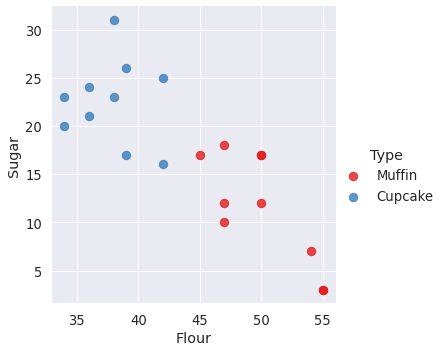

In [11]:
sns.lmplot(x = "Flour",y= "Sugar", data=recipes, hue="Type", palette="Set1", fit_reg=False, scatter_kws={"s": 70})

In [33]:
type_label = np.where(recipes["Type"]=="Muffin", 0, 1)

recipe_features = recipes.columns.values[1:].tolist()

ingredients = recipes[["Flour", "Sugar"]].values
ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]])

In [35]:
model = svm.SVC(kernel="linear")
model.fit(incredients, type_label)

SVC(kernel='linear')

In [88]:
w = model.coef_[0]
a = - w[0] / w[1]     #k = steigung

xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0])/w[1]

b = model.support_vectors_[0]

yy_down = a * xx + (b[1]- a * b[0])

b = model.support_vectors_[-1]

yy_up = a * xx + (b[1]- a * b[0])

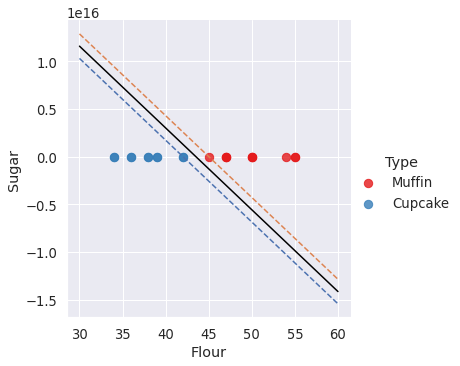

In [57]:
sns.lmplot(x = "Flour",y= "Sugar", data=recipes, hue="Type", palette="Set1", fit_reg=False, scatter_kws={"s": 70})
ptl.plot(xx, yy, color="black")
ptl.plot(xx, yy_up,"--")
ptl.plot(xx, yy_down, "--")


In [66]:
def muffin_or_cupcake(flour, sugar):
    if model.predict([[flour, sugar]]) == 0:
        print("We are looking at a muffin recipe!")
    else:
        print("We are looking at a cupcake recipe")
        
muffin_or_cupcake(10, 40)

We are looking at a cupcake recipe


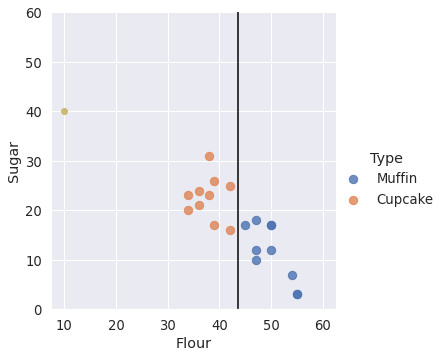

In [97]:
sns.lmplot(x = "Flour",y= "Sugar", 
           data=recipes, 
           hue="Type", 
           fit_reg=False, 
           scatter_kws={"s":70}
          )

ptl.ylim( [ 0, 60 ] )

ptl.plot(xx, yy, color="black")

ptl.plot(10, 40, "yo")